In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
df=pd.read_csv('sales.csv' ,encoding='unicode_escape')

In [26]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [113]:
#df.corr()
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [54]:
# 1.drop unrelated columns
df.drop('Status',axis=1,inplace=True)

KeyError: "['Status'] not found in axis"

In [55]:
df.drop('unnamed1',axis=1,inplace=True)      # drop unrelated columns

In [56]:
#2  check null values
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
#3 drop null values
df.dropna(axis=0,inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [32]:
# 4 What is the average age of customers?
df1=df['Age'].mean()
print(df1)

35.421207003821884


In [132]:
# 5 Who are the majority buyers?(genderwise)
#df.query('Gender =="M" ')[['Gender','Amount']]
df6 = df.groupby('Gender')['Amount'].value_counts()
df6

Gender  Amount 
F       7086.0     9
        7907.0     8
        5349.0     7
        7775.0     7
        8009.0     7
                  ..
M       23513.0    1
        23718.0    1
        23770.0    1
        23809.0    1
        23912.0    1
Name: Amount, Length: 7934, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

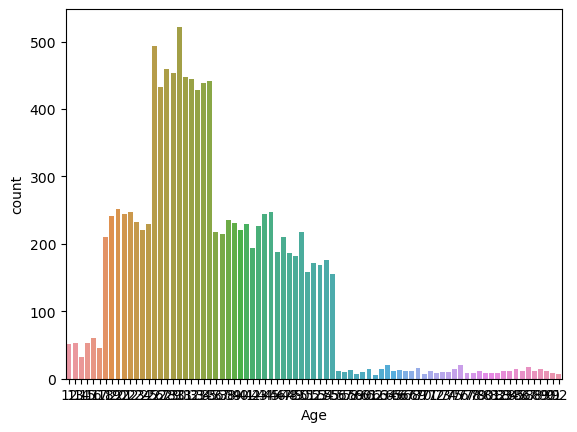

In [119]:
# 6.where do our majority customers fall(age)?
import seaborn as sns
sns.countplot(x='Age',data=df)


In [131]:
# 7.Which state has highest sales?
df5 = df.groupby('State')['Amount'].value_counts()
df5

State           Amount 
Andhra Pradesh  5332.0     3
                6074.0     3
                7800.0     3
                7865.0     3
                7898.0     3
                          ..
Uttarakhand     20239.0    1
                20432.0    1
                20468.0    1
                20608.0    1
                20623.0    1
Name: Amount, Length: 10469, dtype: int64

         Occupation    Orders
0       Agriculture  2.551237
1        Automobile  2.426549
2          Aviation  2.454198
3           Banking  2.477573
4          Chemical  2.419593
5      Construction  2.475845
6   Food Processing  2.536643
7              Govt  2.523419
8        Healthcare  2.453835
9       Hospitality  2.473684
10        IT Sector  2.524953
11           Lawyer  2.531073
12            Media  2.505495
13           Retail  2.534930
14          Textile  2.558739


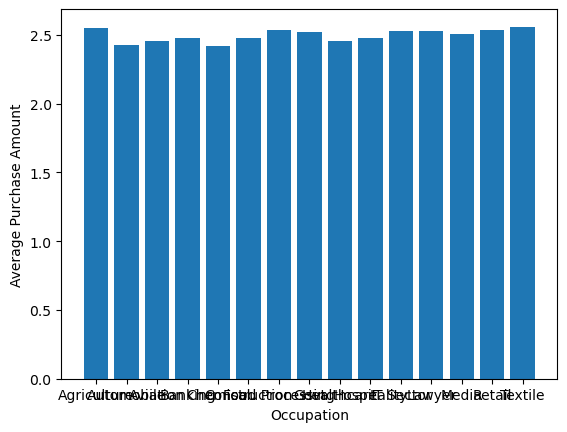

In [133]:
# 8.How does occupation effect the purchase?
df7 = df.groupby('Occupation')['Orders'].mean().reset_index()
print(df7)
plt.bar(df7['Occupation'],df7['Orders'])
plt.xlabel('Occupation')
plt.ylabel('Average Purchase Amount')
plt.show()

In [86]:
# 9. Which are the top 10 products to be sold?
df.sort_values('Product_ID')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [62]:
# 10.What is python function? Create a function to accept input(name) from the user and print name" welcome to symbi

# function: function is a block of code exceuted
name=input('enter the name:')
def user():
     print(name)
        print("welcome to symbi")
        
        
user()

enter the name:shraddha
shraddha
welcome to symbi
